# sklearn

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets, linear_model, neighbors

## linear regression

In [4]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()

In [16]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [17]:
diabetes_X_train, diabetes_X_test = diabetes_X[:-20], diabetes_X[-20:]
diabetes_y_train, diabetes_y_test = diabetes.target[:-20], diabetes.target[-20:]

In [18]:
regr = linear_model.LinearRegression(copy_X = 0)
regr.fit(X = diabetes_X_train, y = diabetes_y_train)

LinearRegression(copy_X=0, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred_lr = regr.predict(diabetes_X_test)

In [32]:
np.mean((diabetes_y_test - y_pred_lr)**2)

2548.0723987259703

In [33]:
regr.score(diabetes_X_test, diabetes_y_test)

0.47257544798227136

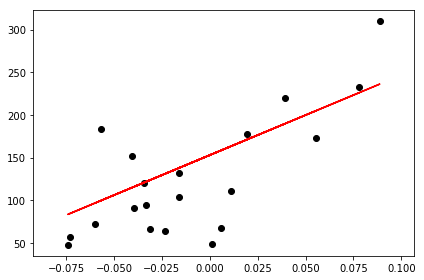

In [34]:
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color = 'red')
plt.tight_layout()

## knn

In [36]:
n_neighbors = 15

In [37]:
iris = datasets.load_iris()

In [44]:
X = iris.data[:, :2]
y = iris.target
h = 0.02 # step size in the mesh

In [87]:
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [88]:
clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = "uniform")

In [89]:
clf.fit(X = X, y = y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [90]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

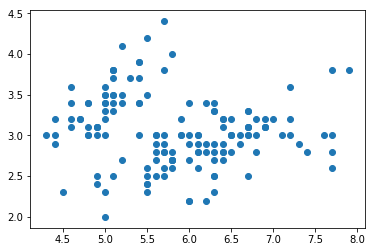

In [91]:
plt.scatter(X[:, 0], X[:, 1])

In [98]:
xx, yy = np.meshgrid(np.arange(x_min ,x_max, h), np.arange(y_min, y_max, h))

In [99]:
xr = xx.ravel()
yr = yy.ravel()

In [100]:
xy = np.c_[xr, yr]; xy

array([[ 3.3 ,  1.  ],
       [ 3.32,  1.  ],
       [ 3.34,  1.  ],
       ..., 
       [ 8.84,  5.38],
       [ 8.86,  5.38],
       [ 8.88,  5.38]])

In [101]:
Z = clf.predict(xy)
Z

array([0, 0, 0, ..., 2, 2, 2])

In [102]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

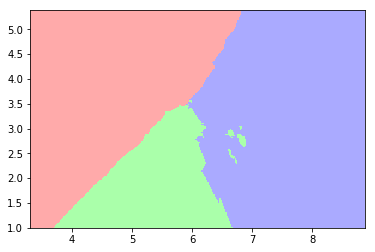

In [103]:
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

(1.0, 5.4000000000000004)

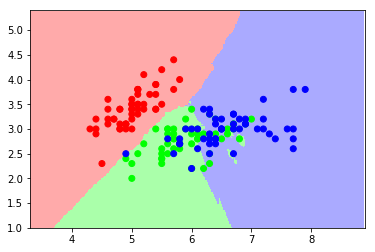

In [110]:
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# decision tree

In [113]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus

In [115]:
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
dot_data = StringIO()

In [118]:
tree.export_graphviz(clf, out_file = dot_data, feature_names=iris.feature_names, class_names=iris.target_names,\
                    filled = True, rounded = True, special_characters = True)

In [121]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')

True